In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import (datasets,model_selection as skms, neighbors, metrics as mt, linear_model as lm)
import sqlite3, pandas as pd

In [2]:
"""Conexión a base de datos y consulta simple"""
conn = sqlite3.connect('letters.db')

letters_df=pd.read_sql('Select * from letters',conn)


lettersData = letters_df

type(letters_df)
print(letters_df)

      lettr  x_box  y_box  width  high  onpix  x_bar  y_bar  x2bar  y2bar  \
0         T      2      8      3     5      1      8     13      0      6   
1         I      5     12      3     7      2     10      5      5      4   
2         D      4     11      6     8      6     10      6      2      6   
3         N      7     11      6     6      3      5      9      4      6   
4         G      2      1      3     1      1      8      6      6      6   
...     ...    ...    ...    ...   ...    ...    ...    ...    ...    ...   
19995     D      2      2      3     3      2      7      7      7      6   
19996     C      7     10      8     8      4      4      8      6      9   
19997     T      6      9      6     7      5      6     11      3      7   
19998     S      2      3      4     2      1      8      7      2      6   
19999     A      4      9      6     6      2      9      5      3      1   

       xybar  x2ybr  xy2br  x_ege  xegvy  y_ege  yegvx  
0          6     1

In [3]:
y = lettersData.iloc[:,:1].values
y = y.ravel()

print(y)
type(y)

['T' 'I' 'D' ... 'T' 'S' 'A']


numpy.ndarray

In [4]:
x = lettersData.iloc[:,1:]
print(x)
type(x)

       x_box  y_box  width  high  onpix  x_bar  y_bar  x2bar  y2bar  xybar  \
0          2      8      3     5      1      8     13      0      6      6   
1          5     12      3     7      2     10      5      5      4     13   
2          4     11      6     8      6     10      6      2      6     10   
3          7     11      6     6      3      5      9      4      6      4   
4          2      1      3     1      1      8      6      6      6      6   
...      ...    ...    ...   ...    ...    ...    ...    ...    ...    ...   
19995      2      2      3     3      2      7      7      7      6      6   
19996      7     10      8     8      4      4      8      6      9     12   
19997      6      9      6     7      5      6     11      3      7     11   
19998      2      3      4     2      1      8      7      2      6     10   
19999      4      9      6     6      2      9      5      3      1      8   

       x2ybr  xy2br  x_ege  xegvy  y_ege  yegvx  
0         10 

pandas.core.frame.DataFrame

In [5]:
"""x_train,x_test,y_train,y_test = skms.train_test_split(x,y,test_size= .4, random_state=0)"""
x_train,x_test,y_train,y_test = skms.train_test_split(x,y,test_size= .01,stratify=y,random_state=0)

In [6]:
"""Pruebas"""
#clasificador knn
model = neighbors.KNeighborsClassifier()
#entrenamiento
model.fit(x_train,y_train)

#mandamos datos a predecir e imprimimos 

predicciones= model.predict(x_test)


j=mt.accuracy_score(predicciones,y_test)
i=mt.confusion_matrix(predicciones,y_test)

print("Precisión %",j)
print("Matriz de confusión: \n",i)



print(y_test,"\n vs  \n",predicciones)






Precisión % 0.94
Matriz de confusión: 
 [[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0]
 [0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 6 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0

<AxesSubplot: >

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


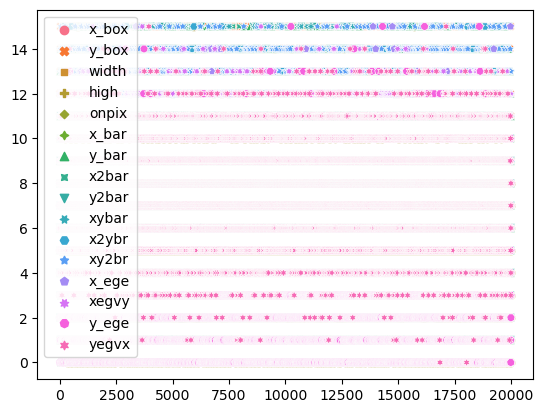

In [7]:
sns.scatterplot(data=letters_df)

<AxesSubplot: >

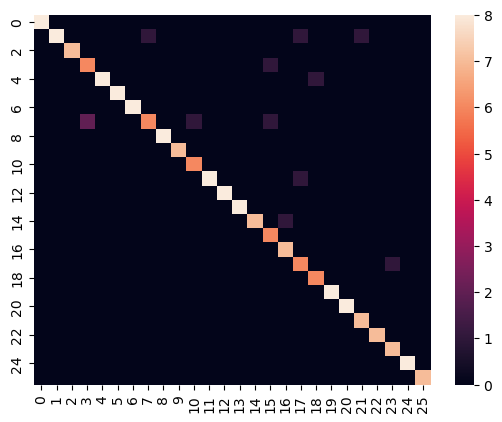

In [8]:
sns.heatmap(i)

In [9]:
#sns.pairplot(letters_df,hue='lettr',height=1.5)

x_box     2
y_box     8
width     3
high      5
onpix     1
x_bar     8
y_bar    13
x2bar     0
y2bar     6
xybar     6
x2ybr    10
xy2br     8
x_ege     0
xegvy     8
y_ege     0
yegvx     8
Name: 0, dtype: int64


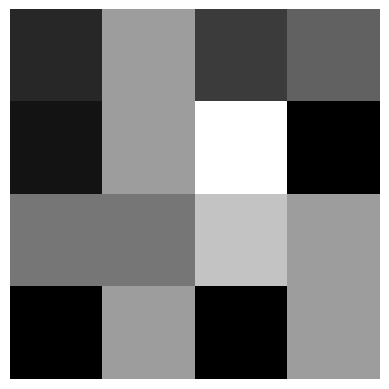

In [10]:


import pandas as pd
import matplotlib.pyplot as plt

# Código para cargar y procesar los datos

# ...

# Graficar la letra

letrademo= x.iloc[0]
print(letrademo)
letra = x.iloc[0].values.reshape(4, 4)  # Suponiendo que cada letra tiene una forma de 4x4

plt.imshow(letra, cmap='gray')  # Utiliza el mapa de colores 'gray' para mostrar la imagen en blanco y negro
plt.axis('off')  # Oculta los ejes
plt.show()


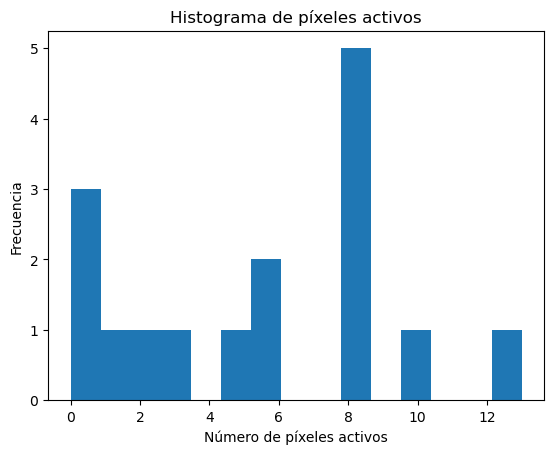

In [11]:
import matplotlib.pyplot as plt
letrademo= x.iloc[0]
plt.hist(letrademo, bins=15)
plt.xlabel('Número de píxeles activos')
plt.ylabel('Frecuencia')
plt.title('Histograma de píxeles activos')
plt.show()


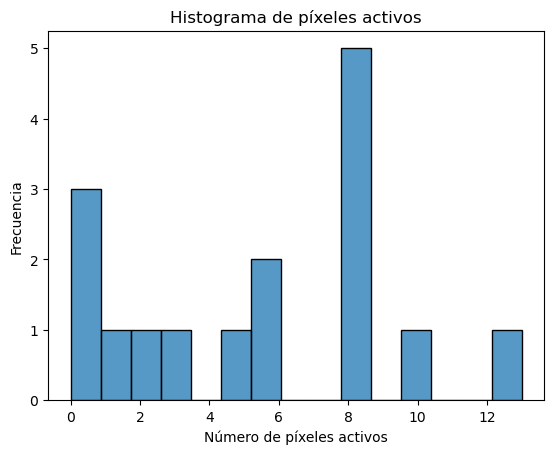

In [12]:
import seaborn as sns
letrademo= x.iloc[0]

# Histograma del atributo 'onpix' utilizando seaborn
sns.histplot(data=letrademo, bins=15)
plt.xlabel('Número de píxeles activos')
plt.ylabel('Frecuencia')
plt.title('Histograma de píxeles activos')
plt.show()

In [13]:
letters_df[letters_df['lettr'] == 'A']


,lettr,x_box,y_box,width,high,onpix,x_bar,y_bar,x2bar,y2bar,xybar,x2ybr,xy2br,x_ege,xegvy,y_ege,yegvx
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
78,A,3,7,5,5,3,12,2,3,2,10,2,9,2,6,3,8
118,A,3,8,5,6,3,9,2,2,3,8,2,8,2,6,3,7
130,A,2,1,4,2,1,8,1,2,2,7,2,8,2,5,2,7
134,A,3,7,5,5,3,10,4,1,2,8,3,9,2,4,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19893,A,3,7,4,5,2,7,4,2,0,6,2,8,2,7,1,7
19951,A,6,10,7,6,3,12,0,4,1,11,4,12,4,4,3,11
19966,A,2,3,3,1,1,6,2,2,1,5,2,8,1,6,1,7
19977,A,3,9,5,6,2,6,5,3,1,6,1,8,2,7,2,7


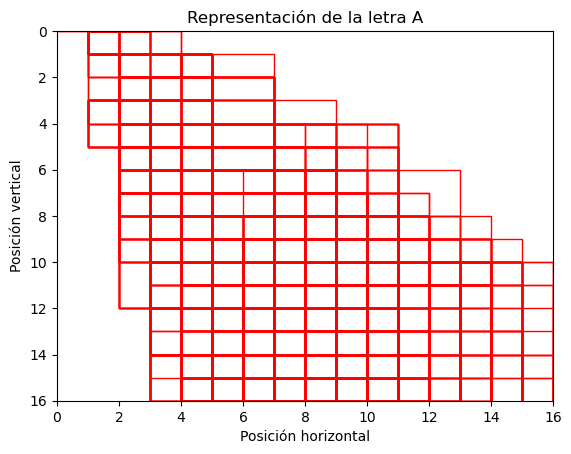

In [19]:
import matplotlib.pyplot as plt

# Supongamos que ya tienes cargado el conjunto de datos en un DataFrame llamado 'df'

# Filtrar el DataFrame para obtener los datos de una letra específica (por ejemplo, la letra 'A')
letter_A = letters_df[letters_df['lettr'] == 'C']

# Obtener los atributos relacionados con la posición y el tamaño de la caja
x_box = letter_A['x_box']
y_box = letter_A['y_box']
width = letter_A['width']
height = letter_A['high']

# Crear un gráfico para representar la letra 'A' basada en los atributos de posición y tamaño
plt.figure()
plt.xlim(0, 16)  # Establecer los límites del eje x
plt.ylim(0, 16)  # Establecer los límites del eje y
plt.gca().invert_yaxis()  # Invertir el eje y para que la gráfica coincida con la orientación de las letras

# Iterar sobre los valores y agregar un rectángulo para cada conjunto de valores
for i in range(len(x_box)):
    rect = plt.Rectangle((x_box.iloc[i], y_box.iloc[i]), width.iloc[i], height.iloc[i], edgecolor='red', facecolor='none')
    plt.gca().add_patch(rect)

# Configurar el título y las etiquetas de los ejes
plt.title('Representación de la letra A')
plt.xlabel('Posición horizontal')
plt.ylabel('Posición vertical')

# Mostrar el gráfico
plt.show()


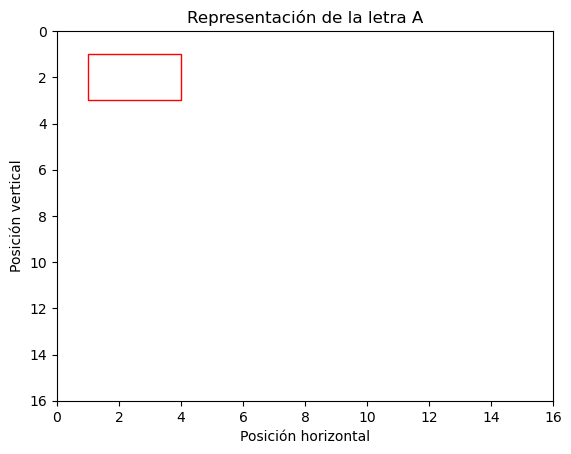

In [15]:
import matplotlib.pyplot as plt

# Supongamos que ya tienes cargado el conjunto de datos en un DataFrame llamado 'df'

# Filtrar el DataFrame para obtener los datos de una letra específica (por ejemplo, la letra 'A')
letter_A = letters_df[letters_df['lettr'] == 'A']

# Obtener el primer registro de la letra 'A'
first_A = letter_A.iloc[0]

# Obtener los atributos relacionados con la posición y el tamaño de la caja
x_box = first_A['x_box']
y_box = first_A['y_box']
width = first_A['width']
height = first_A['high']

# Crear un gráfico para representar la letra 'A' basada en los atributos de posición y tamaño
plt.figure()
plt.xlim(0, 16)  # Establecer los límites del eje x
plt.ylim(0, 16)  # Establecer los límites del eje y
plt.gca().invert_yaxis()  # Invertir el eje y para que la gráfica coincida con la orientación de las letras

# Dibujar un rectángulo para representar la caja del primer registro de la letra 'A'
rect = plt.Rectangle((x_box, y_box), width, height, edgecolor='red', facecolor='none')
plt.gca().add_patch(rect)

# Configurar el título y las etiquetas de los ejes
plt.title('Representación de la letra A')
plt.xlabel('Posición horizontal')
plt.ylabel('Posición vertical')

# Mostrar el gráfico
plt.show()


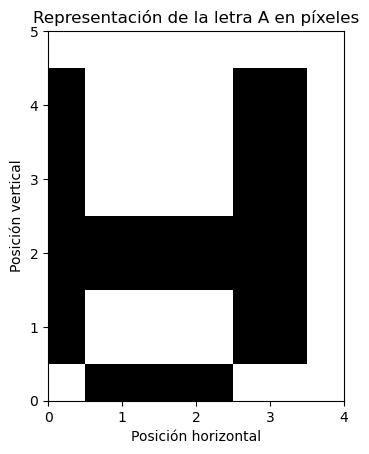

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Definir la forma de la letra 'A' utilizando una matriz de píxeles
letter_A_pixels = np.array([
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 1, 1, 1],
    [1, 0, 0, 1],
    [1, 0, 0, 1]
])

# Obtener las dimensiones de la matriz de píxeles
height, width = letter_A_pixels.shape

# Crear un gráfico para representar la letra 'A'
plt.figure()
plt.imshow(letter_A_pixels, cmap='binary', interpolation='nearest')

# Configurar los límites de los ejes
plt.xlim(0, width)
plt.ylim(0, height)

# Configurar el título y las etiquetas de los ejes
plt.title('Representación de la letra A en píxeles')
plt.xlabel('Posición horizontal')
plt.ylabel('Posición vertical')

# Mostrar el gráfico
plt.show()


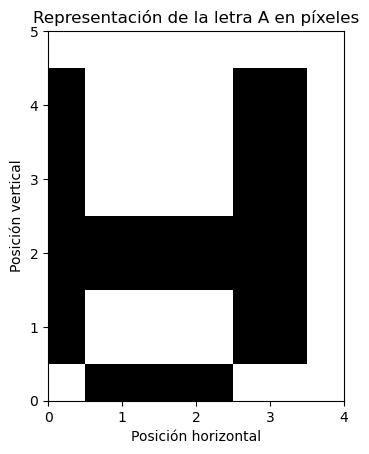

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Definir la forma de la letra 'A' utilizando una matriz de píxeles
letter_A_pixels = np.array([
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 1, 1, 1],
    [1, 0, 0, 1],
    [1, 0, 0, 1]
])

# Obtener las dimensiones de la matriz de píxeles
height, width = letter_A_pixels.shape

# Crear un gráfico para representar la letra 'A'
plt.figure()
plt.imshow(letter_A_pixels, cmap='binary', interpolation='nearest', origin='lower')

# Configurar los límites de los ejes
plt.xlim(0, width)
plt.ylim(0, height)

# Configurar el título y las etiquetas de los ejes
plt.title('Representación de la letra A en píxeles')
plt.xlabel('Posición horizontal')
plt.ylabel('Posición vertical')

# Mostrar el gráfico
plt.show()
